In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp areal

# Areal

> Set of functions for calculating 2 Dimensional areal surface roughness parameters.

In [ ]:
#| export
from rough.data import *
from rough.profile import *

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks, correlate

In [ ]:
#| hide
from fastcore.test import *

To demonstrate, we're going to build on data we processed in `data`

In [ ]:
image    = np.loadtxt('example.txt')
sections = np.load('example_sections.npy')

In [ ]:
#| export
def Sa(im, #Numpy array or arraylike. typically (m,n) for 1 array or (k,m,n) for k (m,n) stacked arrays
        norm = True,
        axis = None,
        sections = False, #If true, calculates the Sa of the stack of images, (i.e. sets axis = (1,2))
        **kwargs
      ):
    '''
    Calculates the mean absolute difference from the mean plane. Equivalent to Ra(array, axis = None)
    '''
    if sections:
        axis = (1,2)
    if norm:
        im = im - np.mean(im, axis = axis, keepdims=True)
        
    return np.mean(np.absolute(im), axis = axis)

In [ ]:
(Sa(image),
 Sa(image,axis = (0,1)),
 Sa(sections,sections=True)[:3],
 Sa(sections,axis=(1,2))[:3])

(0.00047688714130073284,
 0.00047688714130073284,
 array([0.00028241, 0.00042414, 0.00020014]),
 array([0.00028241, 0.00042414, 0.00020014]))

In [ ]:
#| export
def Sms(im, #Numpy array or arraylike. typically (m,n) for 1 array or (k,m,n) for k (m,n) stacked arrays
        norm = True,
        axis = None,
        sections = False, #If true, calculates the Sms of the stack of images, (i.e. sets axis = (1,2))
        **kwargs
       ):
    '''
    Calculates the root mean square difference from the mean plane. Equivalent to Rms(array, axis = None)
    '''
    if sections:
        axis = (1,2)
    if norm:
        im = im - np.mean(im, axis = axis, keepdims = True)

    return np.sqrt(np.mean(np.square(im), axis = axis))

In [ ]:
(Sms(image),Sms(sections,sections=True)[:5])

(0.0006332906519311293,
 array([0.00032491, 0.00049684, 0.0002654 , 0.00028618, 0.0004129 ]))

In [ ]:
#| export
def Ssk(im, #Numpy array or arraylike. typically (m,n) for 1 array or (k,m,n) for k (m,n) stacked arrays
        norm = True,
        axis = None,
        sections = False, #If true, calculates the Ssk of the stack of images, (i.e. sets axis = (1,2))
        **kwargs
       ):
    '''
    Calculates the Skew of the section. Equivalent to Rsk(im, axis = None) for an (m,n) array
    '''
    if sections:
        axis = (1,2)
    if norm:
        im = im - np.mean(im, axis = axis, keepdims = True)
     
    return skew(a = im, axis=axis, **kwargs)
        
        

In [ ]:
(Ssk(image),Ssk(sections, sections = True)[:5])

(0.09500122790758757,
 array([-0.09524635,  0.28831296,  0.70445168, -0.75446586, -0.02569195]))

In [ ]:
#| export
def Sku(im, #Numpy array or arraylike. typically (m,n) for 1 array or (k,m,n) for k (m,n) stacked arrays
        norm = True,
        axis = None,
        sections = False, #If true, calculates the Sku of the stack of images, (i.e. sets axis = (1,2))
        **kwargs #Keyword arguments to modify the behavior of scipy.stats:kurtosis
       ):
    '''
    Calculates the Kurtosis of the section. Equivalent to Rku(im, axis = None) for an (m,n) array
    '''
    if sections:
        axis = (1,2)
    if norm:
        im = im - np.mean(im, axis = axis, keepdims = True)
     
    return kurtosis(a = im, axis=axis, **kwargs)

In [ ]:
(Sku(image),Sku(sections,sections=True)[:5])

(1.705202900719974,
 array([-1.06809856, -0.88850324,  1.07656068, -0.61641668, -0.91538318]))

In [ ]:
array_1 = np.ones((4,4))
array_2 = np.ones((4,4)) * 2
array_3 = np.ones((4,4)) * 3
stack1232 = np.array([array_1, array_2, array_3,array_2])
stack1232

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]],

       [[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]],

       [[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]]])

In [ ]:
#| export
def Sp(im, #Numpy array or arraylike. typically (m,n) for 1 array or (k,m,n) for k (m,n) stacked arrays
        norm = True,
        axis = None,
        sections = False, #If true, calculates the Sp of the stack of images, (i.e. sets axis = (1,2))
        **kwargs #keyword arguments to modify behaviour of numpy.amax
       ):
    '''
    Calculates the maximum peak height of the surface
    '''
    if sections: 
        axis = (1,2)
    if norm:
        im = im - np.mean(im, axis = axis, keepdims = True)
    
    return np.amax(im, axis = axis, **kwargs)

In [ ]:
test_eq(Sp(np.array([2,2,4,4,-6,6]), norm=False), 6)
test_eq(Sp(np.array([0,0,0,0,0,0]), norm=True), 0)
test_eq(Sp(stack1232, norm=False, sections = True), np.array([1,2,3,2]))

In [ ]:
#| export
def Sv(im, #Numpy array or arraylike. typically (m,n) for 1 array or (k,m,n) for k (m,n) stacked arrays
       norm = True,
       axis = None,
       sections = False, #If true, calculates the Sv of the stack of images , (i.e. sets axis = (1,2))
       **kwargs #keyword arguments to modify behaviour of numpy.amin
      ):
    '''
    Calculates the absolute maximum pit depth of the surface
    '''
    if sections:
        axis = (1,2)
    if norm:
        im = im - np.mean(im, axis = axis, keepdims = True)
    
    return abs(np.amin(im,axis = axis, **kwargs))

In [ ]:
test_eq(Sv(np.array([0,0,0,0,-5]), norm = False), 5) 
test_eq(Sv(np.array([1,2,3,2,2,1]), norm = False), 1)
test_eq(Sv(stack1232, norm=False, sections = True), np.array([1,2,3,2]))

In [ ]:
#| export
def Sz(im, #Numpy array or arraylike, typically (m,n) for 1 array or (k,m,n) for k (m,n) stacked arrays
       norm = True,
       axis = None,
       sections = False, #If true, calculates the Sz of the stack of images, (i.e. sets axis = (1,2))
       **kwargs #keyword arguments to be passed to numpy.ptp
      ):
    '''
    Calculates the maximum height (max peak + absolute max pit) of the surface. Synonymous with the range of height
    values or peak to peak. 
    '''
    if sections:
        axis = (1,2)
    if norm:
        im = im - np.mean(im, axis = axis, keepdims = True)
        
    return np.ptp(im, axis = axis, **kwargs)
    

In [ ]:
test_eq(Sz(np.array([0,0,0,5]), norm = False), 5)
test_eq(Sz(np.array([-5,-1,-1,-1]), norm = False), 4)
test_eq(Sz(stack1232, norm = False, sections = True,), np.array([0,0,0,0])) 
test_eq(Sz(np.array([-5,-1,-1,-1,-1])), Sz(np.array([5,1,1,1,1])))

### Spatial Parameters

Autocorrelation is the delayed correlation of a signal with itself. In this case our "signal" is the height data.

To generate the autocorrelation function and visualise it we can use the scipy correlate function.

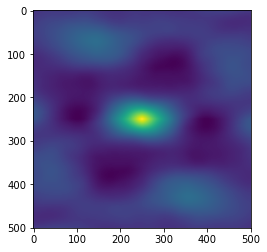

In [ ]:
im_mean = image - np.mean(image,axis=None, keepdims = True)
im_cor = correlate(im_mean,im_mean, mode = 'same')
plt.imshow(im_cor)
plt.show()

The Spatial Autocorellation parameter is the correlation of the surface with itself, with values normalized to be 
in the range [-1,1].

Sal is the distance which has the fastest decay to a given parameter (s), usually 0.2. 

To calculate Sal, we calculate the autocorellation function (acf), normalize the result, generate a distance matrix from the 
center of the array, and find the shortest distance (d) that is  acf <= s. 

We already have the im_cor above. So lets find the Sal step by step. 

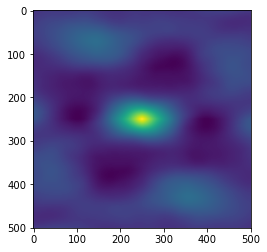

In [ ]:
im_ncor = normalize(im_cor, axis = None, how = 'minmax') #minmax defaults to [-1,1] which is typically unusual
plt.imshow(im_ncor)
plt.show()

Lets see what values are below 0.2

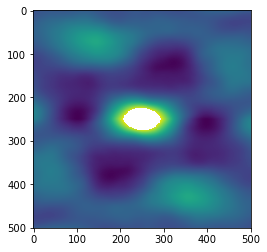

In [ ]:
plt.imshow(np.where(im_ncor <= 0.2, im_ncor, np.NaN))
plt.show()

We need to find the shortest distance from the center to the edge of this oval of NaNs. I generate a distance matrix
and find the min, this might not be the fastest/most efficient solution so if you have a suggestion to improve it then raise an issue on the github!

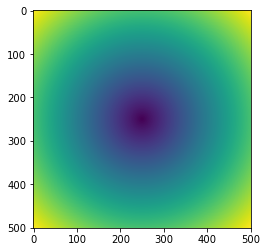

In [ ]:
dists = distance_matrix(im_ncor.shape)
plt.imshow(dists)
plt.show()

Now we filter the dists by the normalize correlation function and return the resulting min. 

In [ ]:
im_Sal = np.nanmin(np.where(im_ncor <= 0.2, dists, np.NaN)) #This reads: Where im_ncor is less than or equal to 0.2, return respective dist, else return NaN
print(f'The images Sal is: {im_Sal} Pixel Units')

The images Sal is: 23.345235059857504 Pixel Units


Note the use of Pixel Units, Rough can't tell what units you are using (yet!), so be sure to convert the pixel distance to whatever unit you are using. 

In [ ]:
def Sal(im, #Numpy array or arraylike, typically (m,n) for 1 array or (k,m,n) for k (m,n) stacked arrays
       norm = True, #Normalize the input array
       norm_how = 'center', #How to normalize the data, see `normalize`,
       axis = None, 
       sections = False, #If true, calculates the Sal of the stack of images, (i.e. sets axis = (1,2))
       s = 0.2, #Default decay value.
       scale = True, #Scale the respective array via im / np.linalg.norm(im)
       **kwargs #keyword arguments to be passed to numpy.ptp
      ):
    '''
    Calculates the autocorellation length parameter. Defined as the horizontal distance of the autocorellation function
    which has the fastest decay to s, with  0 <= s <= 1. 
    Can determine the presense of lay, the direction of the predominant surface pattern. 
    '''
    if sections:
        axis = (1,2)
    
    if norm:
        normalize(im, axis = axis, how = norm_how)
        
    #Calculate and normalize autocorrelation results for the array to (-1,1) range
    im_corr = correlate(im,im,mode = 'same')
    im_norm_corr = normalize(im_corr, axis = axis, how = 'minmax')     
    
    #Find the smallest distance where autocorrelation function is <= s
    dists = distance_matrix(im_norm_corr.shape)
    
    dists_where = np.where(im_norm_corr <= s, dists, np.NaN)
    
    return np.nanmin(dists_where)
    
    #TODO test with stack of images
    #Find the distance which is lowest that matches <= s 


In [ ]:
test_eq(im_Sal, Sal(image))

In [ ]:
distance_matrix(sections.shape).shape


(100, 50)

In [ ]:
a_10 = np.arange(10)
a_10

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
a_20 = np.arange(10,20)
a_20

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [ ]:
np.where(a_10>=5, np.NaN, a_10)

array([ 0.,  1.,  2.,  3.,  4., nan, nan, nan, nan, nan])

In [ ]:
a_16 = np.arange(16).reshape(4,4)
a_16

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
a_dist = distance_matrix(a_16.shape)
a_dist

array([[2.82842712, 2.23606798, 2.        , 2.23606798],
       [2.23606798, 1.41421356, 1.        , 1.41421356],
       [2.        , 1.        , 0.        , 1.        ],
       [2.23606798, 1.41421356, 1.        , 1.41421356]])

In [ ]:
a_where = np.where(a_16>=13, a_dist, np.NaN)
np.nanmin(a_where)

1.0

In [ ]:
#| hide
from nbdev import nbdev_export
nbdev_export()